In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def EM_coins(y,seed=42,iter=1000):
    np.random.seed(seed)
    n=y.size
    pi,p,q=np.random.rand(3)
    Q1=np.empty(n)
    for i in range(iter):
        for j in range(n):  # E step, update Q(z)
            if y[j]==1:
                Q1[j]=pi*p/(pi*p+(1-pi)*q)
            else:
                Q1[j]=pi*(1-p)/(pi*(1-p)+(1-pi)*(1-q))
        # M step, update pi,p,q
        pi=Q1.sum()/n
        p=Q1@y/Q1.sum()
        q=(1-Q1)@y/(1-Q1).sum()
    return pi,p,q

def LL(y,pi,p,q):   # Likelihood
    n=y.size
    P0=np.empty(n)
    P1=np.empty(n)
    for j in range(n):
        if y[j]==1:
            P0=(1-pi)*q
            P1=pi*p
        else:
            P0=(1-pi)*(1-q)
            P1=pi*(1-p)
    return np.log(P0+P1).sum()

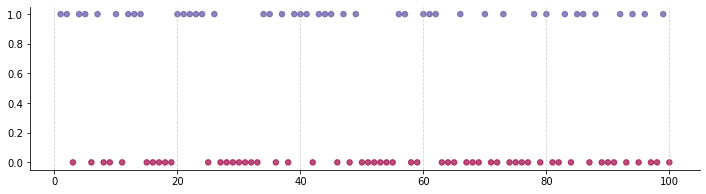

In [3]:
random.seed(42)

n=100
pi,p,q=0.7,0.3,0.6
y=np.empty(n)
for i in range(n):
    dice1=random.random()
    dice2=random.random()
    if (dice1 <=pi and dice2 <= p) or (dice1 > pi and dice2 <= q):
        y[i]=1
    else:
        y[i]=0

fig, ax = plt.subplots(figsize = (12,3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x',linestyle = '--', alpha = 0.6)
plt.scatter(range(1,n+1), y,
            c=y, cmap = plt.cm.Spectral,
            s=30, alpha=0.7)
plt.savefig('../figures/1b.png')
plt.show()

In [16]:
pi_pred,p_pred,q_pred=EM_coins(y)
print(f"""
真实参数：{pi,p,q}
    似然：{LL(y,pi,p,q)}
预测参数：{pi_pred,p_pred,q_pred}
    似然：{LL(y,pi_pred,p_pred,q_pred)}
""")


真实参数：(0.7, 0.3, 0.6)
    似然：-0.4942963218147801
预测参数：(0.04725708308622126, 0.7598099361191546, 0.4241370799460377)
    似然：-0.579818495252942

